# Appendix 2 Figure 4

The code in this tutorial is released under the [MIT License](https://opensource.org/licenses/MIT). All the content in this notebook is under a [CC-by 4.0 License](https://creativecommons.org/licenses/by/4.0/). 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import regseq.utils

# set plotting style
regseq.utils.pboc_style_mpl()

Load in the file containing results of the TOMTOM motif comparison between the discovered binding sites and known sequence motifs from RegulonDB and our prior Sort-Seq experiment.

In [2]:
df = pd.read_csv('tomtom_output.tsv', delimiter='\t')
df.head()

,Query_ID,Target_ID,Optimal_offset,p-value,E-value,q-value,Overlap,Query_consensus,Target_consensus,Orientation
0,marR_right,marR,0,0.000011,0.001041,0.002057,13,TTGCCATGGCCCC,TTGCCCAGGCAACT,-
1,marR_right,rpoD15,0,0.008608,0.817777,0.443345,13,TTGCCATGGCCCC,TTGACATCCCTTTGAATAGGGTATAAT,+
2,marR_right,RhaS,0,0.011763,1.117510,0.443345,13,TTGCCATGGCCCC,TTGAAATTTCGCCGGTA,+
3,marR_right,rpoD17,0,0.011803,1.121240,0.443345,13,TTGCCATGGCCCC,TTGACAAATTATTTAGTTTCTGTTATAAT,+
4,marR_right,rpoD16,0,0.019159,1.820090,0.596031,13,TTGCCATGGCCCC,TTGACATCTTTTATTTTTTCTATATAAT,+


Now we plot the p-values for each `Query_ID`. The ticks and titles were manipulated in Adobe Illustrator.

findfont: Font family ['Lucida Sans Unicode'] not found. Falling back to DejaVu Sans.


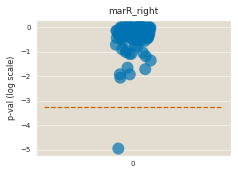

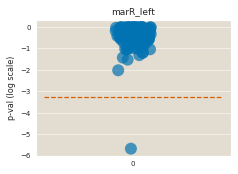

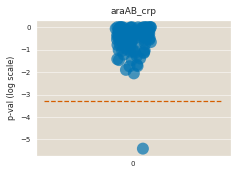

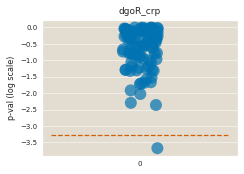

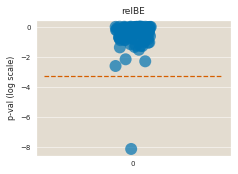

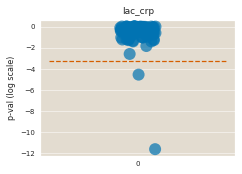

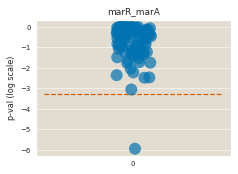

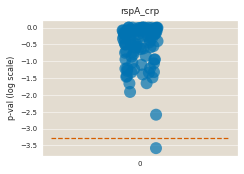

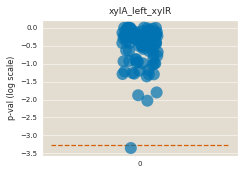

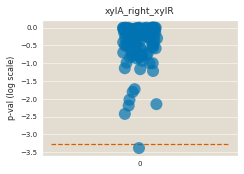

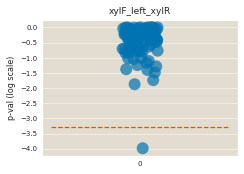

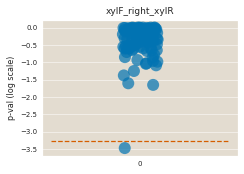

In [4]:
for gene in df['Query_ID'].unique():
    minidf = df[df['Query_ID'] == gene]
    vals = np.log10(np.array(minidf['p-value']))
    fig,ax = plt.subplots()
    sns.stripplot(data= vals,jitter=True,size=12,alpha=.7)
    plt.plot(np.linspace(-.5,.5,100),[np.log10(.05/95) for x in range(100)],linestyle='dashed',color='r')
    ax.set_ylabel('p-val (log scale)')
    ax.set_title(gene)
    #plt.savefig('../plots/' + gene + '_pvalplot.eps',format='eps')